# Computed Tomography (CT) of the Brain
## 1. Problem Definition
For this notebook, we're going to be using deep learning to interprete CT scans of the brain. | How well can our model accurately diagnose the a brain CT scan as a cancer, tumor and aneurysm

## 2. Data
a dataset containing CT brain scans with cancer, tumor, and aneurysm. Each scan represents a detailed image of a patient's brain taken using CT (Computed Tomography). The data are presented in 2 different formats: .jpg and .dcm.

> Note: You can download the dataset Computed Tomography Scan of the Brain https://www.kaggle.com/datasets/trainingdatapro/computed-tomography-ct-of-the-brain/data

## 3. Evaluation
In this project, model performance will be evaluated using, Recall (to ensure very important life threatning conditions are not missed), F1 score(to ensure this is balanced up so no excessive false alarms, ROC-Curve to measure performance accross thresholds, and the general classification reports.

## 4. Features
The dataset consists of CT brain scans with cancer, tumor, and aneurysm. Each scan represents a detailed image of a patient's brain taken using CT (Computed Tomography). The data are presented in 2 different formats: .jpg and .dcm. You can downoad the full version of this file directly from the Kaggle page:

> https://www.kaggle.com/datasets/trainingdatapro/computed-tomography-ct-of-the-brain

### Import Dependables

In [9]:
#Import Dependables
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import pydicom
from PIL import Image
import cv2

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.20.0


### Base Path

In [ ]:
# Base path for the training data
base_path = r'C:\Users\user\Documents\ML_AI\Datasets from Kaggle\Radiology\Computed Tomography (CT) of the Brain dataset\files'


In [11]:
# To check if the path exists
os.path.exists(base_path), os.path.isdir(base_path)

(True, True)

In [12]:
# List files in the base path
os.listdir(base_path)

['aneurysm', 'cancer', 'tumor']

### Function to load DICOM and JPEG files

In [13]:
# Function for simple DICOM file loading
import numpy as np
import pydicom
def load_dicom_file(file_path):
    try: 
        dicom = pydicom.dcmread(file_path)
        image = dicom.pixel_array.astype(np.float32)
        #Normalize
        if np.max(image) > 0:
            image = image / np.max(image)
        #Convert to 3 channels
        if len(image.shape) == 2:
            image = np.stack([image] * 3, axis=-1)
        return image
    except Exception as e:
        print(f"DICOM loading error: {e}")
        return None

In [14]:
#To see the files in aneursym path
aneurysm_path = os.path.join(base_path, 'aneurysm')
os.listdir(aneurysm_path)

['0.dcm',
 '0.jpg',
 '1.dcm',
 '1.jpg',
 '10.dcm',
 '10.jpg',
 '11.dcm',
 '11.jpg',
 '12.dcm',
 '12.jpg',
 '13.dcm',
 '13.jpg',
 '14.dcm',
 '14.jpg',
 '15.dcm',
 '15.jpg',
 '16.dcm',
 '16.jpg',
 '17.dcm',
 '17.jpg',
 '18.dcm',
 '18.jpg',
 '19.dcm',
 '19.jpg',
 '2.dcm',
 '2.jpg',
 '20.dcm',
 '20.jpg',
 '21.dcm',
 '21.jpg',
 '22.dcm',
 '22.jpg',
 '23.dcm',
 '23.jpg',
 '24.dcm',
 '24.jpg',
 '25.dcm',
 '25.jpg',
 '26.dcm',
 '26.jpg',
 '27.dcm',
 '27.jpg',
 '28.dcm',
 '28.jpg',
 '29.dcm',
 '29.jpg',
 '3.dcm',
 '3.jpg',
 '30.dcm',
 '30.jpg',
 '31.dcm',
 '31.jpg',
 '32.dcm',
 '32.jpg',
 '33.dcm',
 '33.jpg',
 '34.dcm',
 '34.jpg',
 '35.dcm',
 '35.jpg',
 '36.dcm',
 '36.jpg',
 '37.dcm',
 '37.jpg',
 '38.dcm',
 '38.jpg',
 '39.dcm',
 '39.jpg',
 '4.dcm',
 '4.jpg',
 '40.dcm',
 '40.jpg',
 '41.dcm',
 '41.jpg',
 '42.dcm',
 '42.jpg',
 '43.dcm',
 '43.jpg',
 '44.dcm',
 '44.jpg',
 '45.dcm',
 '45.jpg',
 '46.dcm',
 '46.jpg',
 '47.dcm',
 '47.jpg',
 '48.dcm',
 '48.jpg',
 '49.dcm',
 '49.jpg',
 '5.dcm',
 '5.jpg',


In [15]:
# To try loading a sample DICOM file
aneurysm_sample_dicom = os.path.join(base_path, 'aneurysm', '15.dcm')
load_dicom_file(aneurysm_sample_dicom)

array([[[-1.0750656, -1.0750656, -1.0750656],
        [-1.0750656, -1.0750656, -1.0750656],
        [-1.0750656, -1.0750656, -1.0750656],
        ...,
        [-1.0750656, -1.0750656, -1.0750656],
        [-1.0750656, -1.0750656, -1.0750656],
        [-1.0750656, -1.0750656, -1.0750656]],

       [[-1.0750656, -1.0750656, -1.0750656],
        [-1.0750656, -1.0750656, -1.0750656],
        [-1.0750656, -1.0750656, -1.0750656],
        ...,
        [-1.0750656, -1.0750656, -1.0750656],
        [-1.0750656, -1.0750656, -1.0750656],
        [-1.0750656, -1.0750656, -1.0750656]],

       [[-1.0750656, -1.0750656, -1.0750656],
        [-1.0750656, -1.0750656, -1.0750656],
        [-1.0750656, -1.0750656, -1.0750656],
        ...,
        [-1.0750656, -1.0750656, -1.0750656],
        [-1.0750656, -1.0750656, -1.0750656],
        [-1.0750656, -1.0750656, -1.0750656]],

       ...,

       [[-1.0750656, -1.0750656, -1.0750656],
        [-1.0750656, -1.0750656, -1.0750656],
        [-1.0750656, -

In [16]:
#Function for loading simple jpg file
from PIL import Image
def load_jpg_file(file_path):
    try:
        image = Image.open(file_path)
        image = np.array(image).astype(np.float32) / 255.0
        # Convert to 3 channels if needed
        if len(image.shape) == 2: 
            image = np.stack([image] * 3, axis=-1)
        elif image.shape[2] == 4:
            image = image[:, :, 3]
        return image
    except Exception as e: 
        print(f"JPG loading error: {e}")
        return None

In [17]:
aneurysm_sample_jpg = os.path.join(base_path, 'aneurysm', '0.jpg')
load_jpg_file(aneurysm_sample_jpg)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

### Function to collect Image data

In [74]:
# Collect image data
def collect_image_data(base_path):
    image_data = []
    labels = []

    categories = ['aneurysm', 'cancer', 'tumor']

    for category in categories:
        category_path = os.path.join(base_path, category)
        if os.path.exists(category_path):
            print(f"Processing category: {category}")
            files = os.listdir(category_path)
            #print(files)

            for file_name in files:
                if not (file_name.endswith('.dcm') or file_name.endswith('.jpg') or file_name.endswith('jfif') ):
                    continue #ignore any file that does not end with those
                file_path = os.path.join(category_path, file_name)
                    #print(file_path)
                if file_name.endswith('.dcm'):
                    image = load_dicom_file(file_path)
                else: 
                    image = load_jpg_file(file_path)
                if image is not None:
                     image = cv2.resize(image, (224, 224))
                     image_data.append(image)
                     labels.append(category)
    return np.array(image_data), np.array(labels)


collect_image_data(base_path)

Processing category: aneurysm
Processing category: cancer
Processing category: tumor


(array([[[[-0.08918695, -0.08918695, -0.08918695],
          [-0.08918695, -0.08918695, -0.08918695],
          [-0.08918695, -0.08918695, -0.08918695],
          ...,
          [-0.08918695, -0.08918695, -0.08918695],
          [-0.08918695, -0.08918695, -0.08918695],
          [-0.08918695, -0.08918695, -0.08918695]],
 
         [[-0.08918695, -0.08918695, -0.08918695],
          [-0.08918695, -0.08918695, -0.08918695],
          [-0.08918695, -0.08918695, -0.08918695],
          ...,
          [-0.08918695, -0.08918695, -0.08918695],
          [-0.08918695, -0.08918695, -0.08918695],
          [-0.08918695, -0.08918695, -0.08918695]],
 
         [[-0.08918695, -0.08918695, -0.08918695],
          [-0.08918695, -0.08918695, -0.08918695],
          [-0.08918695, -0.08918695, -0.08918695],
          ...,
          [-0.08918695, -0.08918695, -0.08918695],
          [-0.08918695, -0.08918695, -0.08918695],
          [-0.08918695, -0.08918695, -0.08918695]],
 
         ...,
 
         [[-

In [19]:
# Collect data
X, y = collect_image_data(base_path)

print(f"Loaded {len(X)} images")
print(f"Data shape: {X.shape}")
print(f"Labels Distribuiton: {np.unique(y, return_counts=True)}")

Processing category: aneurysm
Processing category: cancer
Processing category: tumor
Loaded 518 images
Data shape: (518, 224, 224, 3)
Labels Distribuiton: (array(['aneurysm', 'cancer', 'tumor'], dtype='<U8'), array([168, 182, 168], dtype=int64))


In [20]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)

In [21]:
#Check the shape of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((414, 224, 224, 3), (104, 224, 224, 3), (414,), (104,))

### Create and compile model

In [22]:
# Create model
def create_simple_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2,2)),
        
        Conv2D(64, (3,3), activation='relu'), 
        MaxPooling2D((2,2)),
        
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        
        Flatten(),
        
        Dense(512, activation='relu'),
        Dropout(0.5), 
        
        Dense(256, activation='relu'),
        Dropout(0.3),
        
        Dense(num_classes, activation='softmax')
    ])
    return model




### Load or retrain model

In [ ]:
# Import the loading function
from tensorflow.keras.models import load_model

#Load you model
model = load_model('brain_ct_classifier.keras')
print("Model loaded successfully!")

In [ ]:
#Create and compile model
input_shape = (224, 224, 3)
num_classes = len(np.unique(y_encoded))

model = create_simple_cnn(input_shape, num_classes)

model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)

# Model summary
model.summary()

### Evaluate Model

In [25]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
test_loss, test_acc

print(f"Test Loss: {test_loss: .4f}")
print(f"Test Accuracy: {test_acc: .4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 491ms/step - accuracy: 1.0000 - loss: 0.0057
Test Loss:  0.0057
Test Accuracy:  1.0000


In [26]:
#Predictions
y_preds = model.predict(X_test)
y_preds_classes = np.argmax(y_preds, axis=1)
y_preds_classes

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 395ms/step


array([2, 0, 1, 0, 0, 2, 0, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1, 1, 1, 2, 1,
       2, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 2, 1,
       1, 2, 0, 1, 0, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 1, 2,
       2, 2, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 0, 2, 0], dtype=int64)

In [27]:
#Classification report
print(f"Classification Report")
print(f"{classification_report(y_test, y_preds_classes, target_names= label_encoder.classes_, digits=4)}")


Classification Report
              precision    recall  f1-score   support

    aneurysm     1.0000    1.0000    1.0000        35
      cancer     1.0000    1.0000    1.0000        33
       tumor     1.0000    1.0000    1.0000        36

    accuracy                         1.0000       104
   macro avg     1.0000    1.0000    1.0000       104
weighted avg     1.0000    1.0000    1.0000       104



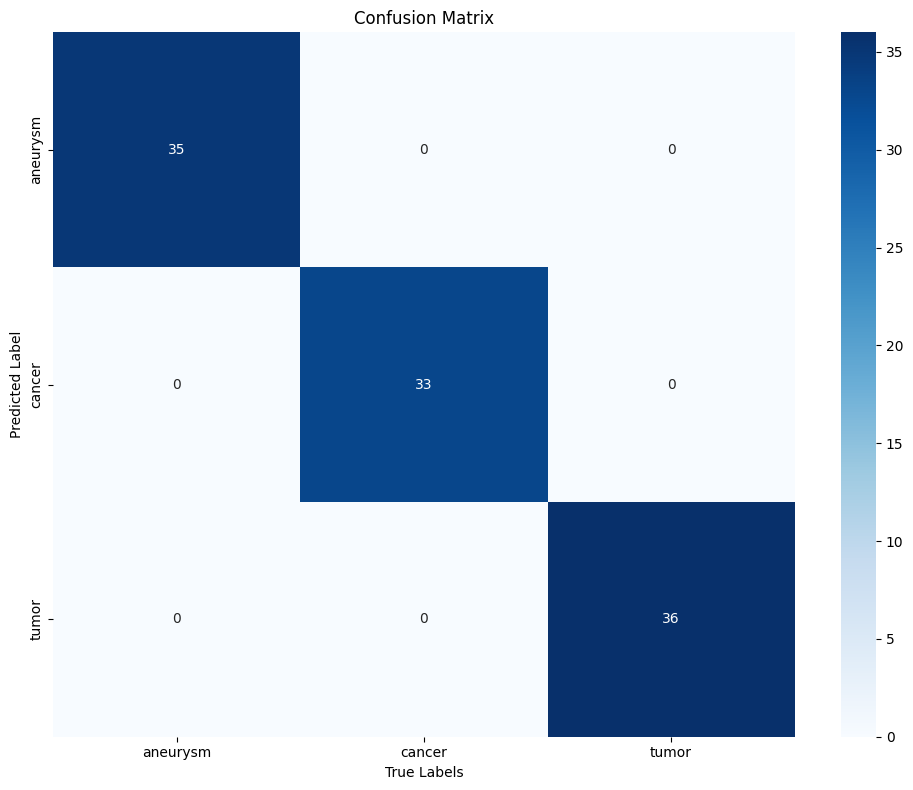

In [28]:
#Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_preds_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('True Labels')
plt.ylabel('Predicted Label')
plt.tight_layout()
plt.show()

NameError: name 'history' is not defined

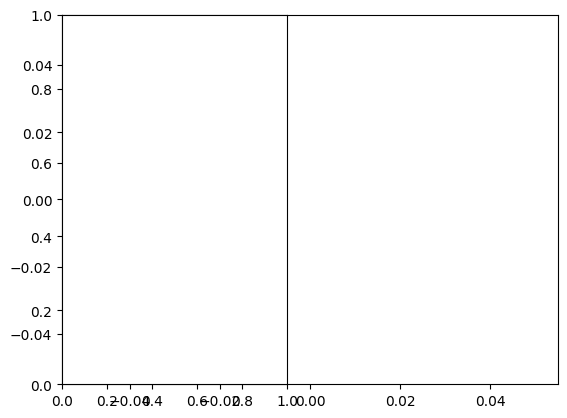

In [29]:
#Training history
plt.plot(figsize=(0, 0))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label= 'Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Traning Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### Prediction functions

In [68]:
#Prediction function for singular images
def predict_image(image_path, model, label_encoder):
    try:
        if image_path.endswith('dcm'):
            image = load_dicom_file(image_path)
        elif image_path.endswith('jpg', 'jfif'):
            image = load_jpg_file(image_path)
        else:
            return None, None
        if image is not None:
            image = cv2.resize(image, (224, 224))
            image = np.expand_dims(image, axis=0)
            prediction = model.predict(image, verbose=1)
            predicted_class = np.argmax(prediction, axis=1)
            predicted_label = label_encoder.inverse_transform(predicted_class)
            confidence =np.max(prediction)
            return predicted_label[0], confidence

    except Exception as e:
        print(f"Prediction error: {e}")
    return None, None

        
#Example Prediction on singular image
random_sample_online = r"C:\Users\user\Downloads\701e0aa0-de20-4c46-8748-434051831770.jpg"
sample_image = r"C:\Users\user\Documents\ML_AI\Datasets from Kaggle\Radiology\Computed Tomography (CT) of the Brain dataset\files\cancer\86.dcm"
predicted_class, confidence = predict_image(sample_image, model, label_encoder)

if predicted_class is not None:
    print(f"\nPrediction for sample image.")
    print(f"Class: {predicted_class}")
    print(f"Confidence: {confidence:.4f}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step

Prediction for sample image.
Class: cancer
Confidence: 0.9997


Processing category: aneurysm
Processing category: cancer
Processing category: tumor
Successfully loaded 26 images, and 26 labels.
(26, 3)
(26,)
(26, 3) (26,) (26, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 1.0000 - loss: 0.1635
Test Loss:  0.1635
Test Accuracy:  1.0000
(26,) (26,)
Classification Report
              precision    recall  f1-score   support

    aneurysm     0.0000    0.0000    0.0000        10
      cancer     0.3750    0.3000    0.3333        10
       tumor     0.3333    0.8333    0.4762         6

    accuracy                         0.3077        26
   macro avg     0.2361    0.3778    0.2698        26
weighted avg     0.2212    0.3077    0.2381        26



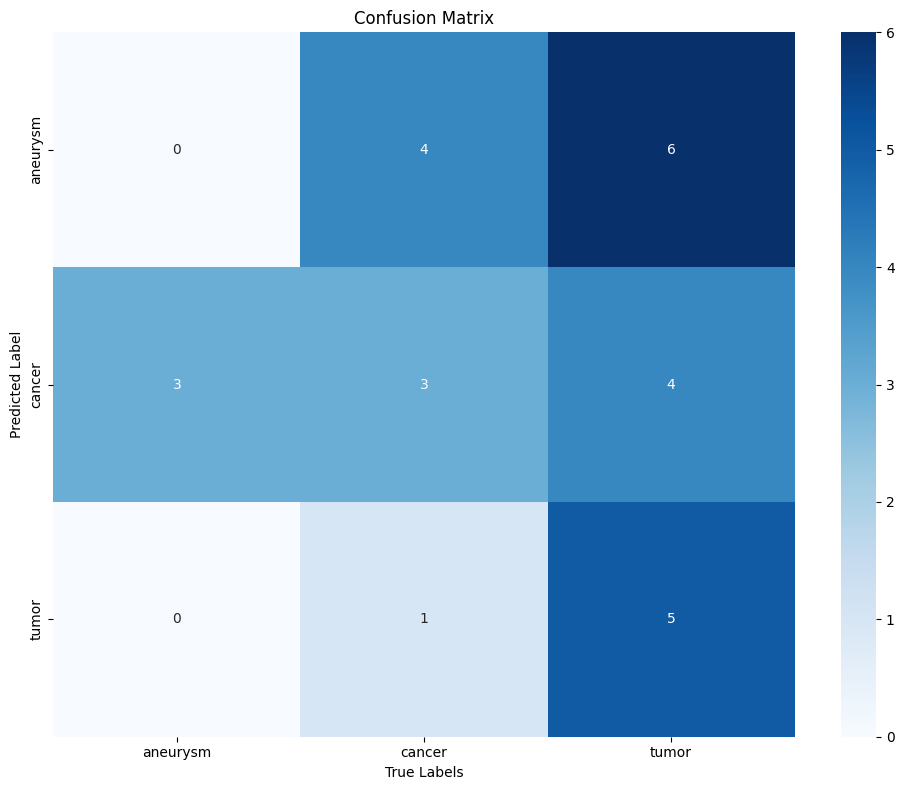

In [109]:
#Prediction function for folder of images
def predict_images(folder_path, model, label_encoder):
   # Fresh start every time
    X, y_strings = collect_image_data(folder_path)
    
    if len(X) == 0:
        print("No images loaded!")
        return
    
    print(f"Successfully loaded {len(X)} images, and {len(y_strings)} labels.")  # Should say 26

    y_pred_probs = model.predict(X, verbose=0)
    print(y_pred_probs.shape)
    y_preds_class = np.argmax(y_pred_probs, axis=1)  # ← This will now be (26,)
    print(y_preds_class.shape)
    

    print(y_pred_probs.shape, y_preds_class.shape, X.shape)
    
    # Evaluate model on test data from random images online
    test_loss, test_acc = model.evaluate(X, y_preds_class)
    test_loss, test_acc

    print(f"Test Loss: {test_loss: .4f}")
    print(f"Test Accuracy: {test_acc: .4f}")

    y_true = label_encoder.transform(y_strings) 
    print(y_true.shape, y_preds_class.shape)
    
    #Classification report
    print(f"Classification Report")
    print(f"{classification_report(y_true, y_preds_class, target_names= label_encoder.classes_, digits=4)}")
        
    #Confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_true, y_preds_class)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('True Labels')
    plt.ylabel('Predicted Label')
    plt.tight_layout()
    plt.show()

#Examples usage of function on a folder with images I downloaded online and sort into a similar folder strucutre
online_test_folder = r"C:\Users\user\Documents\ML_AI\Personal Projects\Computed Tomography (CT) of the Brain\Test data (downloaded randomly online to test the model)"
predict_images(online_test_folder, model, label_encoder)



In [25]:
#Save model

model.save('brain_ct_classifier.keras')
print("Model saved successfully!")

Model saved successfully!


### Improve model

In [7]:
# Improve model
print("\nTrying improved model training...")

#Add early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

# Create a fresh model
model_improved = create_simple_cnn(input_shape, num_classes)
model_improved.compile(
    optimizer=Adam(learning_rate = 0.0005),
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)


#Train with early stopping
history_improved = model_improved.fit(
    X_train, y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)

#Evaluate the improved model
test_loss_imp, test_acc_imp = model_improved.evaluate(X_test, y_test, verbose=0)
print(f"\nImproved Model Results")
print(f"Accuracy: {test_acc_imp: .4f}")

# Compare results
print(f"\nComparison:")
print(f"Original model accuracy: {test_acc:.4f}")
print(f"Improved model accuracy: {test_acc_imp:.4f}")


Trying improved model training...


NameError: name 'create_simple_cnn' is not defined

In [6]:
# Save the better model
if test_acc_imp > test_acc:
    model_improved.save('brain_ct_classifier_final.h5')
    print("Improved model saved as final")
else:
    model.save('brain_ct_classifier_final.h5')
    print("Original model saved as final")


NameError: name 'test_acc_imp' is not defined

In [ ]:
# If accuracy is still low, let's check data quality
print("\nData quality check:")
print(f"Total images: {len(X)}")
print(f"Image shape: {X[0].shape}")
print(f"Data range: [{X.min():.3f}, {X.max():.3f}]")
print(f"Data mean: {X.mean():.3f}")
print(f"Data std: {X.std():.3f}")

### Display images


Data quality check:
Total images: 518
Image shape: (224, 224, 3)
Data range: [-2048.000, 1.000]
Data mean: -14.292


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.08918695..0.9502289].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.13754198..0.87323916].


Data std: 138.258


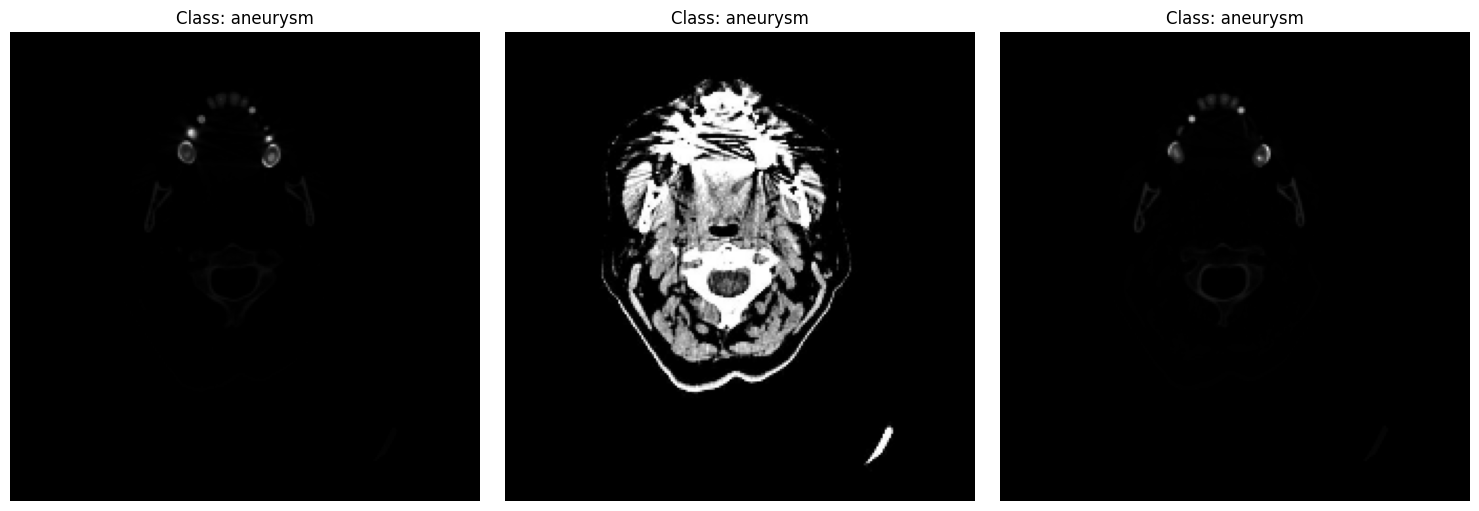

In [111]:
# Display sample images
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(X[i])
    plt.title(f'Class: {y[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.1203501..0.990703].


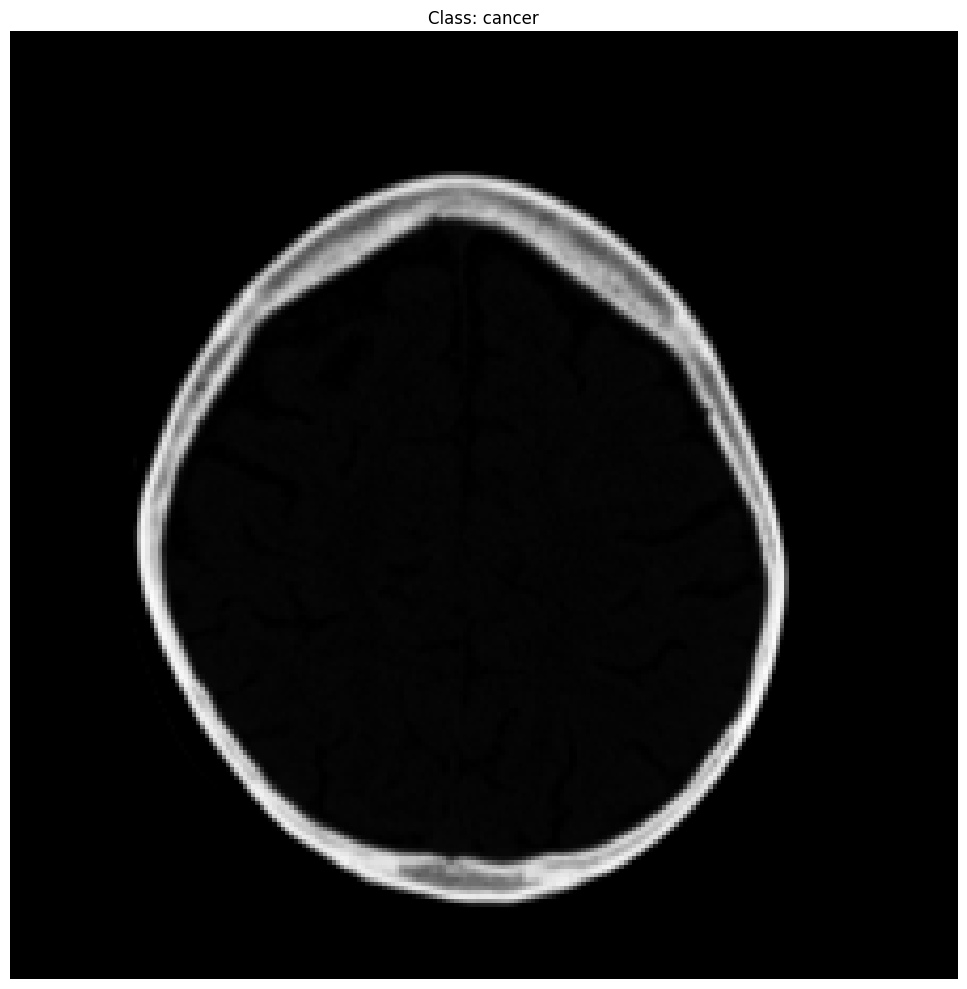

In [117]:
j=294
plt.figure(figsize=(10,10))
plt.imshow(X[j])
plt.title(f'Class: {y[j]}')
plt.axis('off')
plt.tight_layout()
plt.show()

### Upgrading the model with transfer learning


In [119]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def create_transfer_learning_model(input_shape=(224, 224, 3), num_classes=3):
    #Load pre-trained ResNet50 (without top layers)
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    #Freeze the base model (don't train its weights yet)
    base_model.trainable = False

    # Add custom Layers on top
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)

    predictions = Dense(num_classes, activation='softmax')(x)

    #Create the full model
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


#create the new model
transfer_learning_model = create_transfer_learning_model()



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 59s 1us/step


In [ ]:
#Fit the transfer learning model 
history_transfer_model = transfer_learning_model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)

# Model summary
transfer_learning_model.summary()

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 120s 5s/step - accuracy: 0.3720 - loss: 2.0111 - val_accuracy: 0.5577 - val_loss: 0.8946
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 54s 4s/step - accuracy: 0.5314 - loss: 1.1750 - val_accuracy: 0.7019 - val_loss: 1.1626
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 52s 4s/step - accuracy: 0.6184 - loss: 1.1081 - val_accuracy: 0.7500 - val_loss: 0.7467
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 54s 4s/step - accuracy: 0.6908 - loss: 1.3934 - val_accuracy: 0.7404 - val_loss: 0.6778
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.7440 - loss: 1.4850 - val_accuracy: 0.7788 - val_loss: 0.5853
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 53s 4s/step - accuracy: 0.7705 - loss: 0.8903 - val_accuracy: 0.8462 - val_loss: 0.5073
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 54s 4s/step - accuracy: 0.7778 - loss: 1.4741 - val_accuracy: 0.8269 - val_loss: 0.4514
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 55s 4s/step - accuracy: 0.8406 - loss: 1.2655 - val_accuracy: 0.8269 - val_loss